Having created a file with Gaia/SM photometry with notebook LSST-Bright-Gaia-SkyMapper-Query, we will now do out analysis and make plots!


In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = [12, 8]

In [3]:
from astropy.table import Table

#filename='LSST-Gaia-PS1-12-20-30000.fits'
filename='LSST-Gaia-SM-11-20-50000.fits'
results = Table.read(filename)

In [4]:
#one bad thing is that the no data fields become 1e20. 

In [5]:
results

source_id,ra,dec,parallax,parallax_over_error,phot_g_mean_mag,bp_rp,l,b,u_psf,g_psf,r_psf,i_psf,z_psf
,deg,deg,mas,,mag,mag,deg,deg,mag,mag,mag,mag,mag
int64,float64,float64,float64,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32
6369569510812755328,307.0808184296253,-75.54952887907417,3.100122673346884,20.000002,18.305372,3.0930977,318.5306996024935,-32.18627182913157,1e+20,1e+20,1e+20,17.4376,16.6269
5822406207933947264,236.54216258347256,-66.30744332699442,0.4578570640490629,20.000004,15.0276575,0.7333164,319.25786723502785,-9.14461214365005,16.596,15.2752,15.06,14.9433,14.9023
5535370966536274944,114.72880781054464,-42.92727782966175,1.0034601702807633,20.000004,17.023443,1.6553192,256.21332989828824,-10.167229414296013,1e+20,17.9262,17.1761,16.5147,16.2118
4063470555986293632,268.2722690750943,-27.840792649974965,0.8603942336373175,20.000006,16.057327,1.2159605,1.7844034336897427,-0.8451794430770536,1e+20,16.5819,16.0633,15.7223,15.5719
4075924930328092928,279.156157491139,-26.245544915444775,1.8075668270434355,20.000006,16.76521,2.018447,7.794098821232397,-8.631934819903805,1e+20,18.0061,16.9165,16.0774,15.7234
5998972450905257728,232.4507551076889,-46.81400727988406,0.7060744679049201,20.000006,15.408483,0.9796734,329.0547931790715,7.867881096379992,17.1576,15.8283,1e+20,1e+20,1e+20
5736155980334693376,137.33281517932804,-11.695644712582691,1.1258811864223772,20.000008,16.370586,1.4076071,241.14813245685508,23.632003038318526,1e+20,17.0417,16.4131,15.9575,15.7778
5969496640142194432,250.46952778938714,-39.13549871225904,0.7965530986366196,20.00001,15.659661,1.3556786,344.01809633910796,4.7032384357999595,18.4516,16.2913,1e+20,15.2893,15.0855


Text(0, 0.5, 'dec (deg ICRS)')

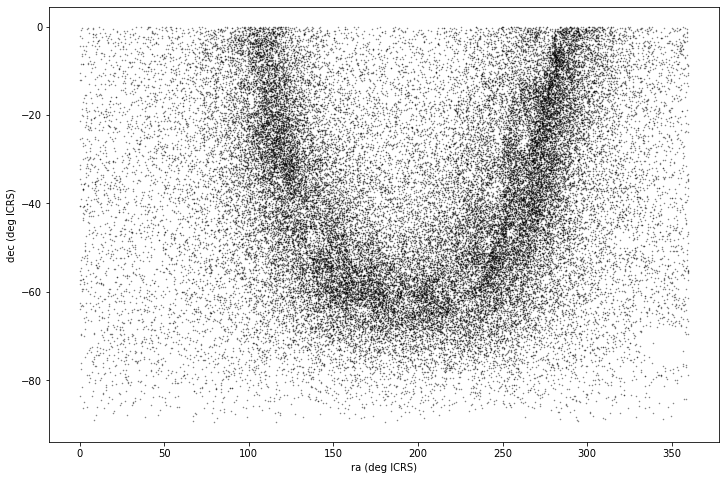

In [6]:
#Let's look at position on the sky, just to check
ra=results['ra']
dec=results['dec']

plt.plot(ra,dec, 'ko',alpha=0.5,markersize=0.5)
plt.xlabel('ra (deg ICRS)')
plt.ylabel('dec (deg ICRS)')

Our query limited to 5,000 in this case has selected (apparently) random sources . The galactic planes is obvious with many more sources. The next plot shows this in galactic coordinates:

Text(0, 0.5, 'b (deg Galactic)')

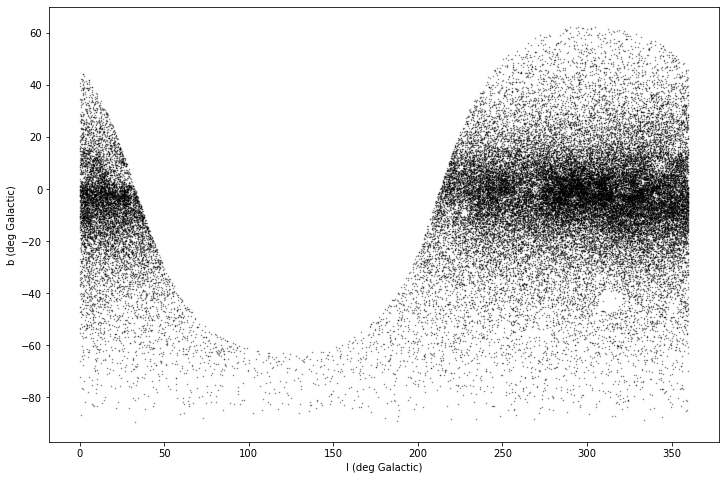

In [7]:
l=results['l']
b=results['b']

plt.plot(l,b, 'ko',alpha=0.5,markersize=0.5)
plt.xlabel('l (deg Galactic)')
plt.ylabel('b (deg Galactic)')

In [8]:
dm = 5.0*np.log10(1000.0/results['parallax'])-5.0
absmag_g = results['g_psf']-dm
absmag_r = results['r_psf']-dm
absmag_i = results['i_psf']-dm
absmag_z = results['z_psf']-dm
absmag_u = results['u_psf']-dm
col_gi = results['g_psf'] - results['i_psf']
col_ri = results['r_psf'] - results['i_psf']
col_iz = results['i_psf'] - results['z_psf']
col_ug = results['u_psf'] - results['g_psf']
mag_g=results['g_psf']
mag_r=results['r_psf']
mag_i=results['i_psf']
mag_z=results['z_psf']
mag_u=results['u_psf']

(11.0, 23.0)

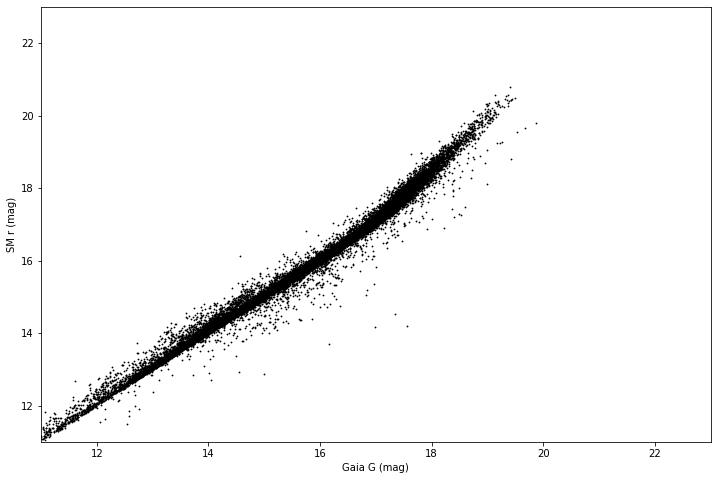

In [9]:
#check on Gaia - PS1 correlation. 
plt.plot(results['phot_g_mean_mag'],results['r_psf'],'ko',markersize=0.8)
plt.xlabel('Gaia G (mag)')
plt.ylabel('SM r (mag)')
plt.ylim(11.0,23.0)
plt.xlim(11.0,23.0)

Gaia magnitude (the broad-band G) is correlated with PS1 r magnitude, as we would hope. The few outliers may be bad pairings but have no effect on our analysis.  

(0.1, 5.0)

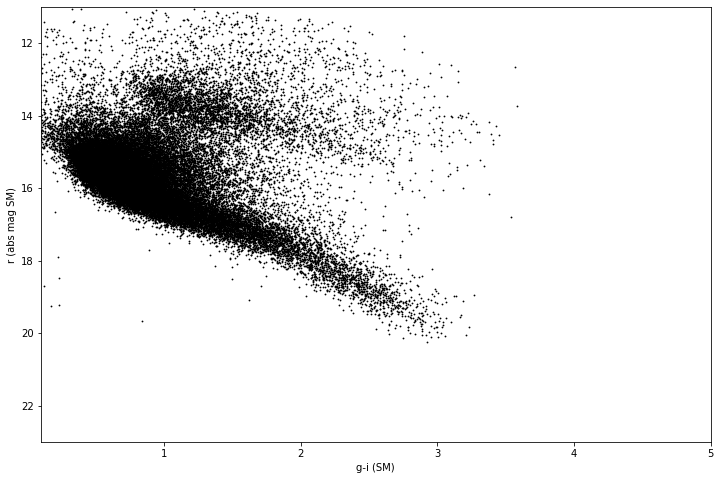

In [10]:
#check color mag PS1 correlation. 
plt.plot(col_gi,mag_r,'ko',markersize=0.8)
plt.xlabel('g-i (SM)')
plt.ylabel('r (abs mag SM)')
plt.ylim(23,11.0)
plt.xlim(0.1,5)
#start at 0.1 because 1e20 problem is not masked yet.


In [11]:
#LSST saturation for 15 second exposure in 0.7 arcsec seeing according to LSST Science Book
#u, g, r, i, z, y =
#14.7, 15.7, 15.8, 15.8, 15.3 and 13.9
bright15=[14.7,15.7,15.8,15.8,15.3,13.9]
bright30=bright15+2.5*np.log10(30.0/15.0)
bright01=bright15+2.5*np.log10(1.0/15.0)
bright03=bright15+2.5*np.log10(3.0/15.0)
bright05=bright15+2.5*np.log10(5.0/15.0)
#August 2020 report includes simulations of 1s and 5s short exposures. 
# See page 40, PSTN-051 https://pstn-051.lsst.io


In [12]:
#look at this just to make sure it went the right direction.  
bright01


array([11.75977185, 12.75977185, 12.85977185, 12.85977185, 12.35977185,
       10.95977185])

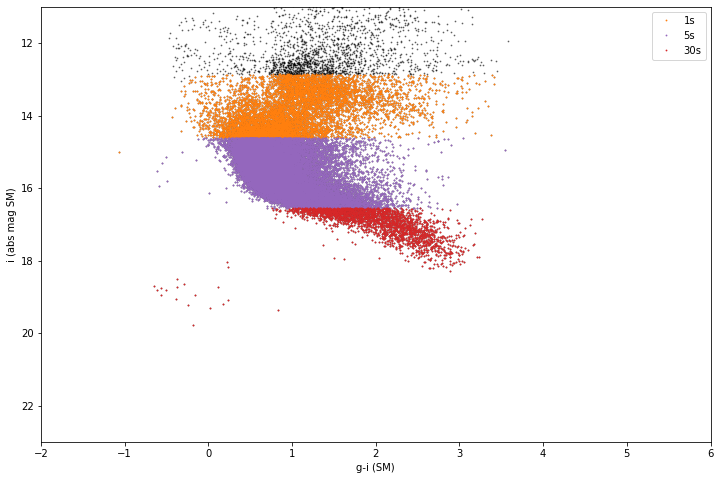

In [13]:
igood = (mag_i > bright30[3]) & (mag_g > bright30[1])
ishort = (mag_i > bright05[3]) & (mag_g > bright05[1]) & ((mag_i < bright30[3]) | (mag_g < bright30[1]))
iveryshort = (mag_i > bright01[3]) & (mag_g > bright01[1]) & ((mag_i < bright05[3]) | (mag_g < bright05[1]))
#
plt.plot(col_gi,mag_i,'ko',markersize=0.8,alpha=0.5)
plt.plot(col_gi[iveryshort],mag_i[iveryshort],'o',color='C1',markersize=0.8,label='1s')
plt.plot(col_gi[ishort],mag_i[ishort],'o',color='C4',markersize=0.8,label='5s')
plt.plot(col_gi[igood],mag_i[igood],'o',color='C3',markersize=0.8,label='30s')
plt.xlabel('g-i (SM)')
plt.ylabel('i (abs mag SM)')
plt.ylim(23,11.0)
plt.xlim(-2,6)
plt.legend();

The colors here show that our selection is working... the faint stars (red) will not be saturated in a 30s exposoure, the others will. The purple become unsaturated in the 5s exposure. Orange stars are only unsaturated in the 1s exposure. Note the the parallax error ratio cut imposes an implicit distance limit so this is not a fir representation of all stars observed by Gaia, PS1 or LSST.  

From now on, let's look at absolute magnitudes. Warning: Reddening is significant as you can see in the broad main sequence, especially for the bluer (g,r) colors.

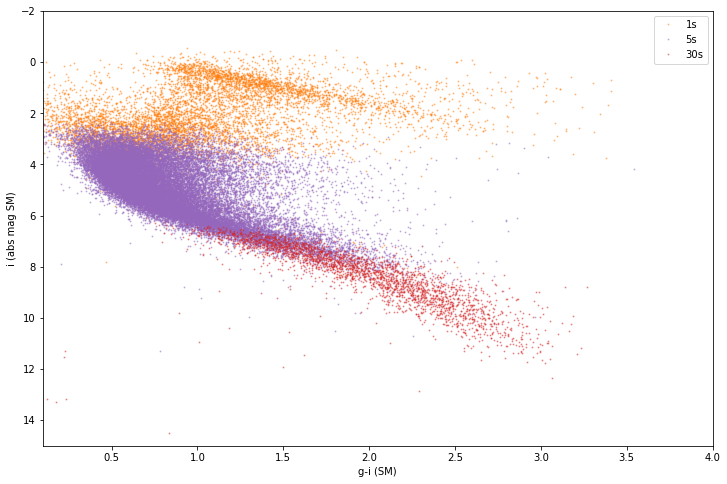

In [14]:
igood = (mag_i > bright30[3]) & (mag_g > bright30[1])
ishort = (mag_i > bright05[3]) & (mag_g > bright05[1]) & ((mag_i < bright30[3]) | (mag_g < bright30[1]))
iveryshort = (mag_i > bright01[3]) & (mag_g > bright01[1]) & ((mag_i < bright05[3]) | (mag_g < bright05[1]))
#
#plt.plot(col_gi,absmag_i,'ko',markersize=0.5,alpha=0.1)
plt.plot(col_gi[iveryshort],absmag_i[iveryshort],'o',color='C1',markersize=1,label='1s',alpha=0.4)
plt.plot(col_gi[ishort],absmag_i[ishort],'o',color='C4',markersize=1,label='5s',alpha=0.4)
plt.plot(col_gi[igood],absmag_i[igood],'o',color='C3',markersize=1,label='30s',alpha=0.4)
plt.xlabel('g-i (SM)')
plt.ylabel('i (abs mag SM)')
plt.ylim(15,-2.0)
plt.xlim(0.1,4)
plt.legend();

The key results are that M dwarfs (and white dwarfs) with high quality parallaxes will be the only ones that the main LSST survey (30s exposure) will directly measure. (They're within 500 pc, see plots below.) If we want a high quality sample of GK dwarfs directly on the LSST system with Gaia parallaxes (or similar ancillary data), then we need the 5s exposures. The 1s would extend up to the main sequence turnoff, F stars, etc.  SkyMapper DR2 is fairly shallow compared to PS1.

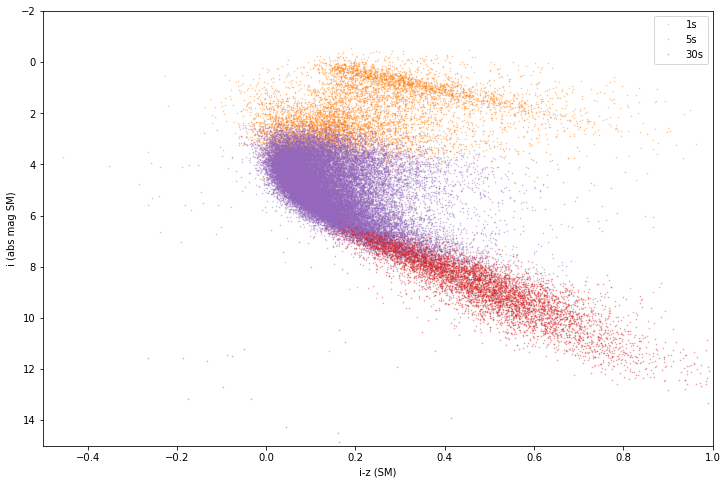

In [15]:
igood = (mag_i > bright30[3]) & (mag_z > bright30[4])
ishort = (mag_i > bright05[3]) & (mag_z > bright05[4]) & ((mag_i < bright30[3]) | (mag_z < bright30[4]))
iveryshort = (mag_i > bright01[3]) & (mag_z > bright01[4]) & ((mag_i < bright05[3]) | (mag_z < bright05[4]))
#
#plt.plot(col_iz,absmag_i,'ko',markersize=0.6,alpha=0.1)
plt.plot(col_iz[iveryshort],absmag_i[iveryshort],'o',color='C1',markersize=0.6,label='1s',alpha=0.4)
plt.plot(col_iz[ishort],absmag_i[ishort],'o',color='C4',markersize=0.6,label='5s',alpha=0.4)
plt.plot(col_iz[igood],absmag_i[igood],'o',color='C3',markersize=0.6,label='30s',alpha=0.4)
plt.xlabel('i-z (SM)')
plt.ylabel('i (abs mag SM)')
plt.ylim(15,-2.0)
plt.xlim(-0.5,1)
plt.legend();

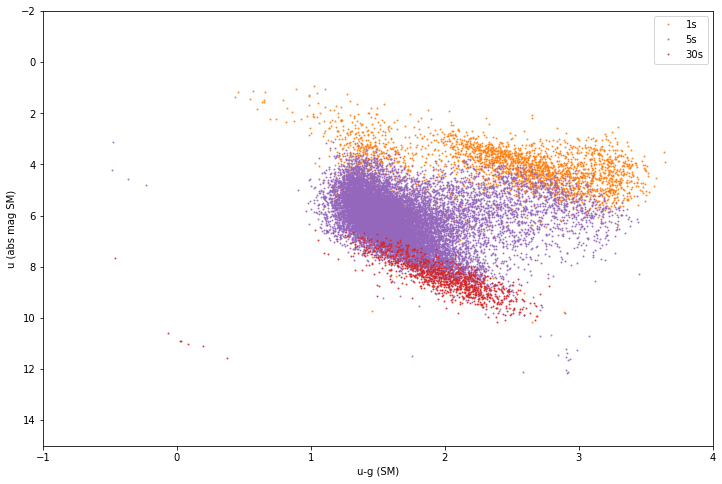

In [16]:
igood = (mag_g > bright30[1]) & (mag_u > bright30[0])
ishort = (mag_g > bright05[1]) & (mag_u > bright05[0]) & ((mag_g < bright30[1]) | (mag_u < bright30[0]))
iveryshort = (mag_g > bright01[1]) & (mag_u > bright01[0]) & ((mag_g < bright05[1]) | (mag_u < bright05[0]))
#
#plt.plot(col_iy,absmag_i,'ko',markersize=0.8,alpha=0.1)
plt.plot(col_ug[iveryshort],absmag_u[iveryshort],'o',color='C1',markersize=1,label='1s',alpha=0.8)
plt.plot(col_ug[ishort],absmag_u[ishort],'o',color='C4',markersize=1,label='5s',alpha=0.8)
plt.plot(col_ug[igood],absmag_u[igood],'o',color='C3',markersize=1,label='30s',alpha=0.8)
plt.xlabel('u-g (SM)')
plt.ylabel('u (abs mag SM)')
plt.ylim(15,-2.0)
plt.xlim(-1,4)
plt.legend()

Most stars with u in SkyMapper will be saturated in LSST, but is that an artifact of SkyMapper DR2's limited data?

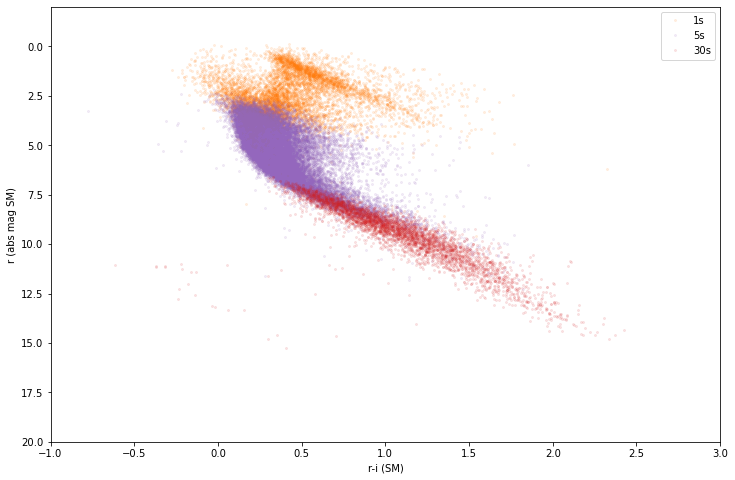

In [17]:
igood = (mag_i > bright30[3]) & (mag_r > bright30[2])
ishort = (mag_i > bright05[3]) & (mag_r > bright05[2]) & ((mag_i < bright30[3]) | (mag_r < bright30[2]))
iveryshort = (mag_i > bright01[3]) & (mag_r > bright01[2]) & ((mag_i < bright05[3]) | (mag_r < bright05[2]))
#
#plt.plot(col_ri,absmag_r,'k.',markersize=1,alpha=0.1)
plt.plot(col_ri[iveryshort],absmag_r[iveryshort],'o',color='C1',markersize=2,label='1s',alpha=0.1)
plt.plot(col_ri[ishort],absmag_r[ishort],'o',color='C4',markersize=2,label='5s',alpha=0.1)
plt.plot(col_ri[igood],absmag_r[igood],'o',color='C3',markersize=2,label='30s',alpha=0.1)
plt.xlabel('r-i (SM)')
plt.ylabel('r (abs mag SM)')
plt.ylim(20,-2.0)
plt.xlim(-1,3)
plt.legend();
#plt.savefig('LSST-Gaia-PS1-ri-mr.png');

In [18]:
mask_not_plane=(np.abs(results['b'])> 20) 

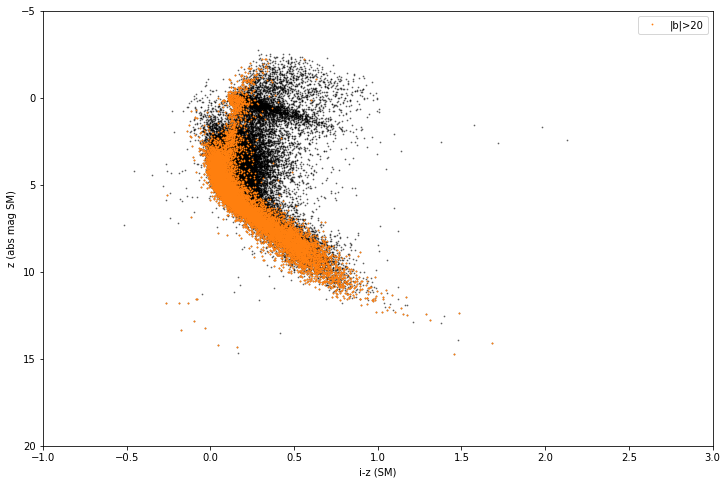

In [19]:
plt.plot(col_iz,absmag_z,'ko',markersize=0.8,alpha=0.5)
plt.plot(col_iz[mask_not_plane],absmag_z[mask_not_plane],'o',color='C1',markersize=0.8,label='|b|>20')
plt.xlabel('i-z (SM)')
plt.ylabel('z (abs mag SM)')
plt.ylim(20,-5.0)
plt.xlim(-1,3)
plt.legend();

In [20]:
distance = 1000.0/results['parallax']

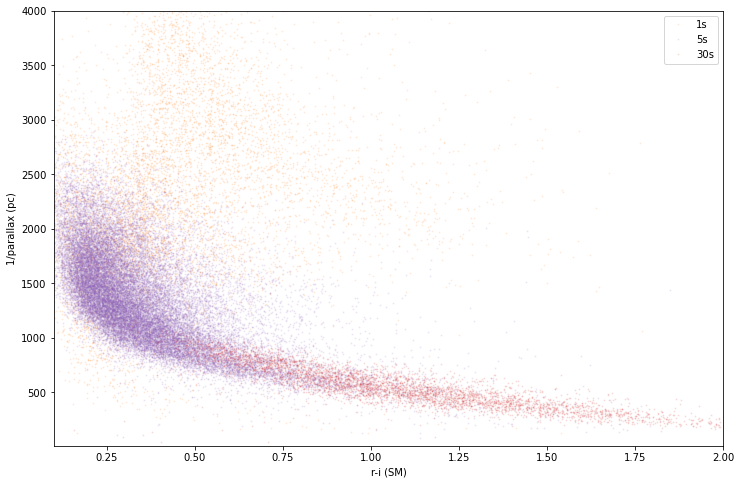

In [21]:
igood = (mag_i > bright30[3]) & (mag_r > bright30[2])
ishort = (mag_i > bright05[3]) & (mag_r > bright05[2]) & ((mag_i < bright30[3]) | (mag_r < bright30[2]))
iveryshort = (mag_i > bright01[3]) & (mag_r > bright01[2]) & ((mag_i < bright05[3]) | (mag_r < bright05[2]))
#
#plt.plot(col_ri,absmag_r,'k.',markersize=1,alpha=0.1)
plt.plot(col_ri[iveryshort],distance[iveryshort],'.',color='C1',markersize=2,label='1s',alpha=0.1)
plt.plot(col_ri[ishort],distance[ishort],'.',color='C4',markersize=2,label='5s',alpha=0.1)
plt.plot(col_ri[igood],distance[igood],'.',color='C3',markersize=2,label='30s',alpha=0.1)
plt.xlabel('r-i (SM)')
plt.ylabel('1/parallax (pc)')
plt.ylim(10,4000)
plt.xlim(0.1,2)
plt.legend()
plt.savefig('LSST-Gaia-PS1-ri-distance.png');

Some bad measurments with 0 color have crept in and should be ignored, or cut off as in this plot.  I think it is due to the fits format changing "no measurement" to 1e20, and 1e20-1e20 = 0 !!!! Not worth fixing.  

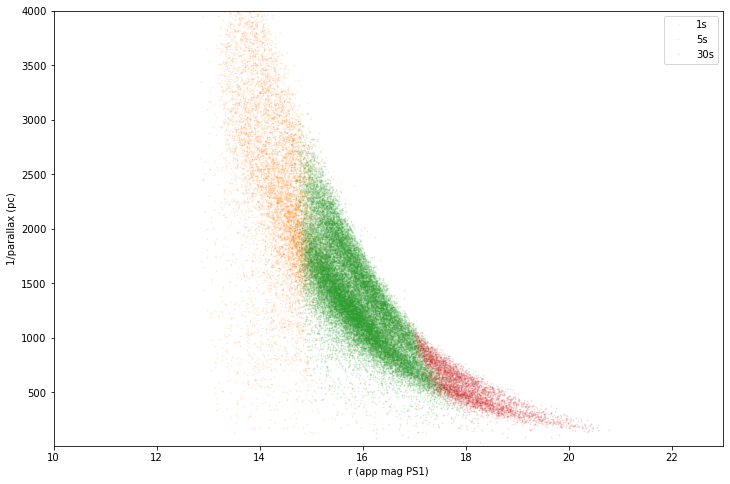

In [22]:
igood = (mag_i > bright30[3]) & (mag_r > bright30[2])
ishort = (mag_i > bright05[3]) & (mag_r > bright05[2]) & ((mag_i < bright30[3]) | (mag_r < bright30[2]))
iveryshort = (mag_i > bright01[3]) & (mag_r > bright01[2]) & ((mag_i < bright05[3]) | (mag_r < bright05[2]))
#
#plt.plot(col_ri,absmag_r,'k.',markersize=1,alpha=0.1)
plt.plot(mag_r[iveryshort],distance[iveryshort],'.',color='C1',markersize=2,label='1s',alpha=0.1)
plt.plot(mag_r[ishort],distance[ishort],'.',color='C2',markersize=2,label='5s',alpha=0.1)
plt.plot(mag_r[igood],distance[igood],'.',color='C3',markersize=2,label='30s',alpha=0.1)
plt.xlabel('r (app mag PS1)')
plt.ylabel('1/parallax (pc)')
plt.ylim(10,4000)
plt.xlim(10,23)
plt.legend()
plt.savefig('LSST-Gaia-PS1-mr-distance.png');

Maybe worth noting that we have limited ourselves to 50,000 sources (or fewer, depending on the notebook you ran) so rare objects would also be present.  